<a href="https://colab.research.google.com/github/juniperlovato/DiverseMisinformationPaper/blob/main/pocs3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##imports

In [ ]:
#plotting
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

import pandas as pd # library for data analysis
import numpy as np
import scipy.stats as stats


##Load and clean data

In [ ]:
# filepath = '/content/drive/MyDrive/pocs/vocab_cs_mod.txt'
filepath1 = 'https://pdodds.w3.uvm.edu/teaching/courses/2022-2023pocsverse/docs/vocab_cs_mod.txt'
filepath2 = 'https://pdodds.w3.uvm.edu/teaching/courses/2022-2023pocsverse/docs/google_vocab_rawwordfreqs.txt'
vocab = pd.read_csv(filepath1, header=None, sep=' ', names=['k', 'Nk'])
vocab_raw = pd.read_csv(filepath2, header=None, sep=' ')


In [ ]:
vocab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238591 entries, 0 to 238590
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   k       238591 non-null  int64
 1   Nk      238591 non-null  int64
dtypes: int64(2)
memory usage: 3.6 MB


In [ ]:
vocab

k     Nk
0       30578667846      1
1       22077031422      1
2       21594821357      1
3       19401194714      1
4       16337125274      1
...             ...    ...
238586          204  46023
238587          203  48262
238588          202  46787
238589          201  48179
238590          200  48030

[238591 rows x 2 columns]

In [ ]:
vocab_raw

0
0         95119665584
1         95119665584
2         30578667846
3         22077031422
4         21594821357
...               ...
13588386          200
13588387          200
13588388          200
13588389          200
13588390          200

[13588391 rows x 1 columns]

## 4.a Plot the frequency distribution Nk representing how many distinct words appear k times in this particular corpus as a function of k.

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


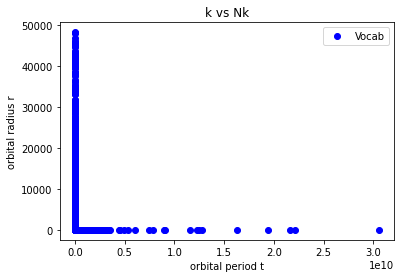

In [ ]:
plt.plot(vocab['k'], vocab['Nk'], marker='o', lw=0, color='b', label='Vocab')
plt.legend()
plt.title("k vs Nk")
plt.xlabel('orbital period t')
plt.ylabel('orbital radius r')

plt.savefig('/content/drive/MyDrive/pocs/vocab.PDF', dpi=600)
plt.show()

## 4.b Repeat the same plot in log-log space (using base 10, i.e., plot log10 Nk as a function of log10 k).

Restrict to only the slice of data that is approximately linear.

In [ ]:
linear_vocab = vocab[vocab.k < 10**5]
linear_vocab

k     Nk
147678  99999      1
147679  99998      2
147680  99994      1
147681  99992      1
147682  99991      2
...       ...    ...
238586    204  46023
238587    203  48262
238588    202  46787
238589    201  48179
238590    200  48030

[90913 rows x 2 columns]

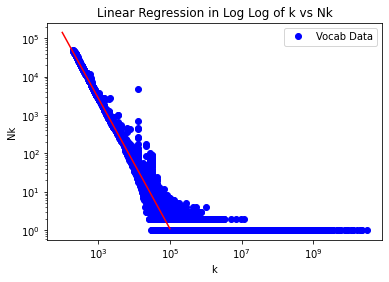

c: 366414018.6810332
intercept: 8.563972081042072
alpha: -1.7052776463860235
r^2: 0.928030


In [ ]:
slope, intercept, r_value, pv, se = stats.linregress(np.log10(linear_vocab['k']), np.log10(linear_vocab['Nk']))
c_vocab = 10**intercept
alpha_vocab = slope

a = 10**2
b = 10**5
regression_range = np.arange(a,b)

# sns.regplot(x="k", y="Nk", data=vocab, ci=None, label="vocab, y={0:.1f}x+{1:.1f}".format(slope, intercept)).legend(loc="best")
# plt.plot(np.arange(1,10000),-5*np.power(np.arange(1,10000),2/3),color='r',label='2/3 law')

plt.plot(vocab['k'], vocab['Nk'],marker='o',lw=0,color='b',label='Vocab Data')
plt.legend()
plt.loglog(base=10)
plt.title("k vs Nk in Log-Log Space")
plt.xlabel('k')
plt.ylabel('Nk')

plt.savefig('/content/drive/MyDrive/pocs/vocabloglog.PDF', dpi=600)

plt.plot(regression_range,c_vocab*np.power(regression_range,alpha_vocab),color='r',label=r'scaling model, exponent = %f' % slope)
plt.title("Linear Regression in Log Log of k vs Nk")
plt.savefig('/content/drive/MyDrive/pocs/vocabloglog_regression.PDF', dpi=600)

plt.show()

print(f"c: {c_vocab}")
print(f"intercept: {intercept}")
print(f"alpha: {alpha_vocab}")
print(f"r^2: {r_value**2:.6f}")

## 5. Using your eyeballs, indicate over what range power-law scaling appears to hold and, estimate, using least squares regression over this range, the exponent in the fit Nk ∼ k−γ (we’ll return to this estimate later).

In [ ]:
scatter = px.scatter(vocab, x="k", y="Nk", hover_name="Nk")

regression = px.line(x=regression_range,y=c_vocab*np.power(regression_range,alpha_vocab))

fig = go.Figure(data = scatter.data + regression.data)
fig.update_layout(xaxis_type="log", yaxis_type="log")

fig['data'][1]['line']['color']='red'

fig.show()

## 6. Compute the mean and standard deviation for the entire sample (not just for the restricted range you used in the preceding question). Based on your answers to the following questions and material from the lectures, do these values for the mean and standard deviation make sense given your estimate of $\gamma$?

Hint: note that we calculate the mean and variance from the distribution Nk; a
common mistake is to treat the distribution as the set of samples. Another routine
misstep is to average numbers in log space (oops!) and to average only over the
range of k values you used to estimate $\gamma$

In [ ]:
sum_nk = vocab['Nk'].sum()
sum_nk 

13538092

In [ ]:
# print(vocab['k'])
# print(vocab['Nk'])

For the mean, we compute the number of occurrences of the average word in the corpus. We can either directly compute the mean of the raw frequency data or use the aggregated data by weighting each entry $k$ with its frequency $N_k$ and then dividing by the total number of words, which is the sum of all $N_k$. We decide to use the aggregated data.

$$ \mu = \frac{\sum_{k=1}kN_k}{\sum_{k=1} N_k} = \langle k \rangle $$


In [ ]:
sum_knk = (np.multiply(vocab['k'], vocab['Nk'])).sum()
expected_k = sum_knk/sum_nk
print(f"mean: {expected_k}")



mean: 61651.63497241709


From before:

$$ \mu = \frac{\sum_{k=1}kN_k}{\sum_{k=1} N_k} = \langle k \rangle $$

Note: $P_k=\frac{N_k}{\sum_{k'}N_{k'}}.$

Remember: $\langle x^n \rangle = \int x^nP(x)\mathrm{d}x$.

It follows that $\langle k^n \rangle = \frac{\sum_{k=1}k^nN_k}{\sum_{k=1} N_k}$.

$$ \sigma^2 = \text{Variance} = \langle k^2\rangle - \langle k \rangle^2 = \frac{\sum_{k=1}k^2N_k}{\sum_{k=1} N_k} - \mu^2 $$

To avoid integer overflows, we make sure the division happens before we square $k$:

$$ \langle k^2 \rangle = \sum_{k=1} k \frac{k}{\sum_{k=1}N_k}N_k $$

In [ ]:
import math

vocab.astype({'k': 'uint64'})

expected_k2 = (np.multiply(np.multiply(vocab['k'], np.divide(vocab['k'],sum_nk)), vocab['Nk'])).sum()
print(expected_k2)

variance = expected_k2 - expected_k*expected_k
print(f"variance: {variance}")
std_dev = math.sqrt(variance)
print(f"std. dev: {std_dev}")

281701829628252.4
variance: 281698028704157.6
std. dev: 16783862.151011538
